In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=16,6
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Giva_App_data.csv')

In [3]:
df.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,01-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,02-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,03-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,04-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,05-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%


In [4]:
df.shape

(112, 14)

In [5]:
df.describe()

,Unique Page Views,Add to Cart,Order Comp
count,112.000000,112.000000,112.000000
mean,6212.723214,1618.160714,482.642857
std,1989.873558,610.822405,150.517836
min,3256.000000,704.000000,171.000000
25%,4480.750000,1190.500000,367.250000
50%,5707.000000,1416.000000,460.000000
75%,7764.500000,1957.000000,586.000000
max,11345.000000,3434.000000,1053.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   112 non-null    object
 1   New Installs           112 non-null    object
 2   Returning Users        112 non-null    object
 3   Uninstalls             112 non-null    object
 4   Net new installs       112 non-null    object
 5   Uninstall rate         112 non-null    object
 6   DAU                    112 non-null    object
 7   Unique Page Views      112 non-null    int64 
 8   Page view conversion   112 non-null    object
 9   Add to Cart            112 non-null    int64 
 10  A2C Conv               112 non-null    object
 11  AddtoCart (Prod page)  112 non-null    object
 12  Order Comp             112 non-null    int64 
 13  Overall Conv           112 non-null    object
dtypes: int64(3), object(11)
memory usage: 12.4+ KB


In [7]:
df.isnull().sum()

Date                     0
New Installs             0
Returning Users          0
Uninstalls               0
Net new installs         0
Uninstall rate           0
DAU                      0
Unique Page Views        0
Page view conversion     0
Add to Cart              0
A2C Conv                 0
AddtoCart (Prod page)    0
Order Comp               0
Overall Conv             0
dtype: int64

In [8]:
df.dtypes

Date                     object
New Installs             object
Returning Users          object
Uninstalls               object
Net new installs         object
Uninstall rate           object
DAU                      object
Unique Page Views         int64
Page view conversion     object
Add to Cart               int64
A2C Conv                 object
AddtoCart (Prod page)    object
Order Comp                int64
Overall Conv             object
dtype: object

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

In [10]:
df['Overall Conv']=df['Overall Conv'].str.rstrip("%").astype(float)/100

In [11]:
df.head()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-09-01,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,0.0343
2021-09-02,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,0.0329
2021-09-03,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,0.0196
2021-09-04,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,0.0254
2021-09-05,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,0.0234


In [12]:
df.tail()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-12-17,"18,208","1,703","4,573","10,813",25.12%,"37,544",10308,27.46%,2934,7.81%,28.46%,772,0.0206
2021-12-18,"15,839","1,586","3,612","11,520",22.80%,"29,238",11095,37.95%,2976,10.18%,26.82%,784,0.0268
2021-12-19,"20,939","1,643","4,349","10,290",20.77%,"32,057",9182,28.64%,2374,7.41%,25.85%,588,0.0183
2021-12-20,"18,982","1,711","3,027","10,297",15.95%,"35,508",9399,26.47%,3202,9.02%,34.07%,783,0.0221
2021-12-21,"17,206","1,541","7,560","10,863",43.94%,"34,707",10183,29.34%,3434,9.89%,33.72%,663,0.0191


<AxesSubplot:xlabel='Date'>

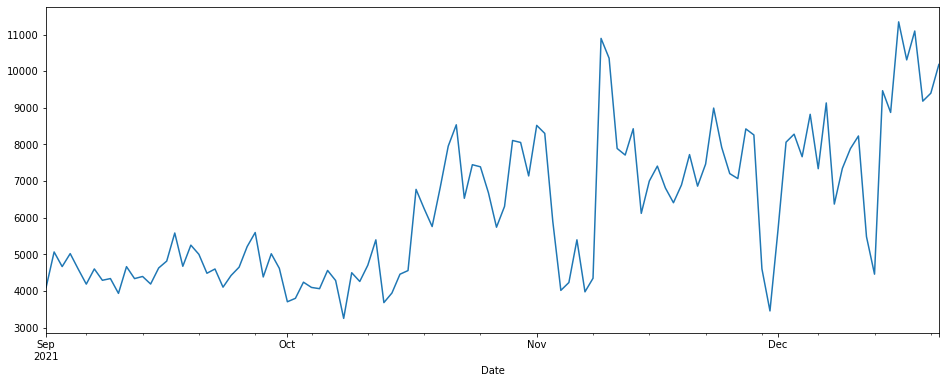

In [13]:
df['Unique Page Views'].plot(xlim=['2021-09-01','2021-12-21'])

<AxesSubplot:xlabel='Date'>

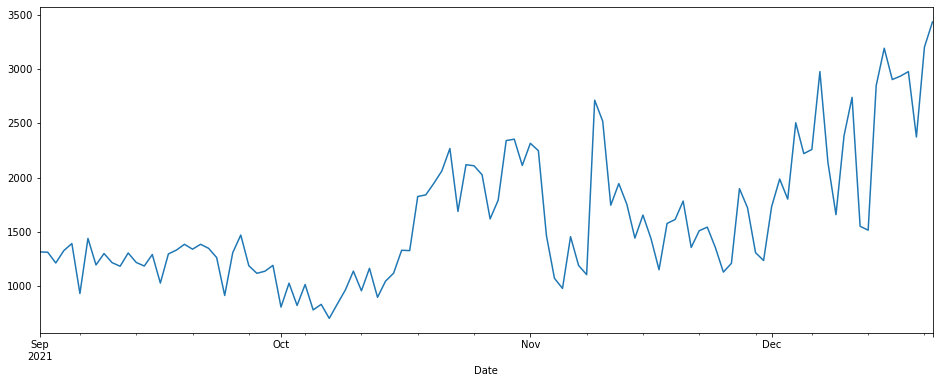

In [14]:
df['Add to Cart'].plot(xlim=['2021-09-01','2021-12-21'])

<AxesSubplot:xlabel='Date'>

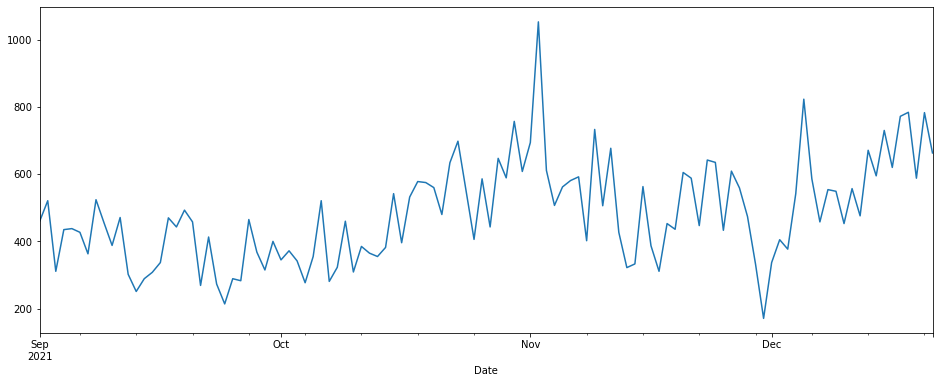

In [15]:
df['Order Comp'].plot(xlim=['2021-09-01','2021-12-21'])

In [16]:
# Year End Min Frequency
min=df.resample(rule='A').min()

In [17]:
min

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-12-31,"10,017","1,000","1,021","10,222",13.02%,"11,342",3256,16.32%,704,10.18%,15.68%,171,0.0101


In [18]:
# Year And Max Frequency
max=df.resample(rule='A').max()

In [19]:
max

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-12-31,"9,914",995,970,"9,970",66.09%,"37,544",11345,40.96%,3434,9.95%,35.96%,1053,0.0408


In [20]:
# Quater End Max Frequency
quater_max=df.resample(rule='QS').max()

In [21]:
quater_max

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-07-01,"9,914",960,"4,374",8106,42.98%,"24,511",5598,35.06%,1471,9.81%,32.11%,524,0.0349
2021-10-01,"9,765",995,970,"9,970",66.09%,"37,544",11345,40.96%,3434,9.95%,35.96%,1053,0.0408


<AxesSubplot:xlabel='Date'>

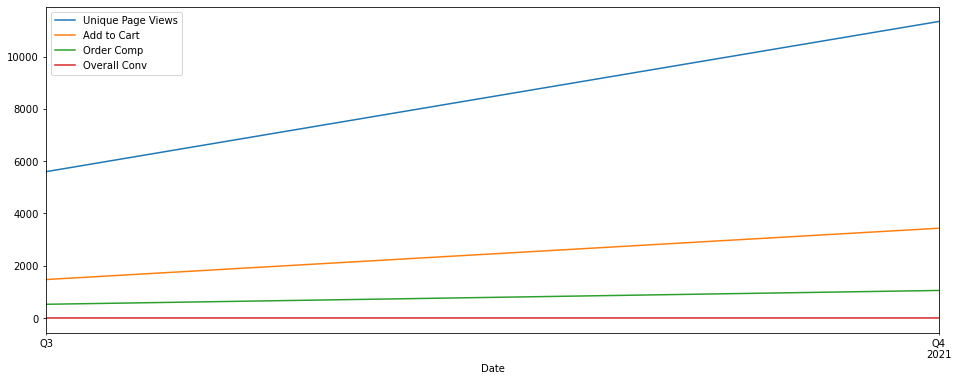

In [22]:
quater_max.plot()

In [23]:
# Quater End Min Frequency
quater_min=df.resample(rule='QS').min()

In [24]:
quater_min

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-07-01,"10,017","1,082","1,552","4,590",13.86%,"13,421",3938,21.44%,915,4.89%,20.67%,214,0.0127
2021-10-01,"10,286","1,000","1,021","10,222",13.02%,"11,342",3256,16.32%,704,10.18%,15.68%,171,0.0101


<AxesSubplot:xlabel='Date'>

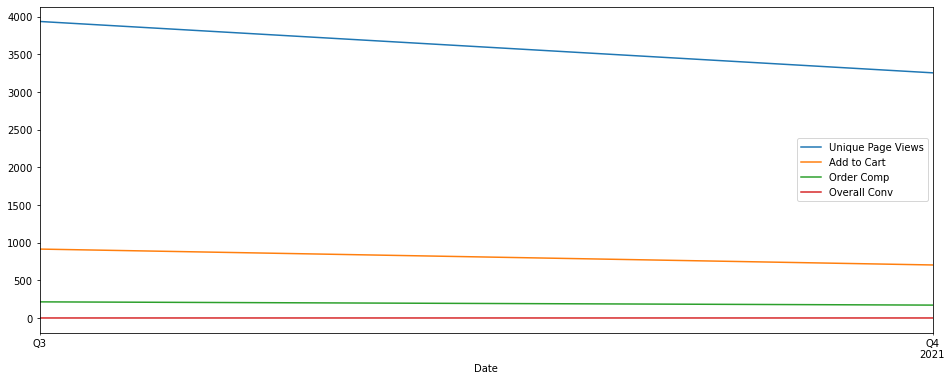

In [25]:
quater_min.plot()

In [26]:
# Quater End Max Frequncy
quater_max=df.resample(rule='QS').max()

In [27]:
quater_max

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-07-01,"9,914",960,"4,374",8106,42.98%,"24,511",5598,35.06%,1471,9.81%,32.11%,524,0.0349
2021-10-01,"9,765",995,970,"9,970",66.09%,"37,544",11345,40.96%,3434,9.95%,35.96%,1053,0.0408


<AxesSubplot:xlabel='Date'>

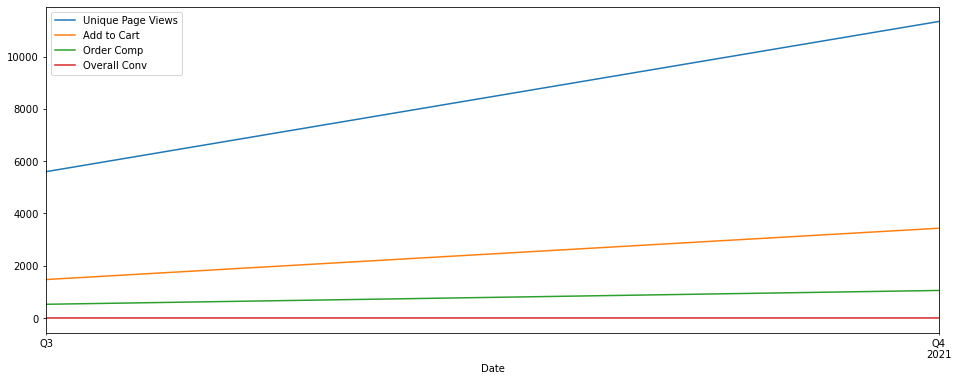

In [28]:
quater_max.plot()

In [29]:
# Business End Frequency
business_max=df.resample(rule='BA').max()

In [30]:
business_max

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-12-31,"9,914",995,970,"9,970",66.09%,"37,544",11345,40.96%,3434,9.95%,35.96%,1053,0.0408


In [31]:
business_min=df.resample('BA').min()

In [32]:
business_min

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
Date,,,,,,,,,,,,,
2021-12-31,"10,017","1,000","1,021","10,222",13.02%,"11,342",3256,16.32%,704,10.18%,15.68%,171,0.0101


<AxesSubplot:xlabel='Date'>

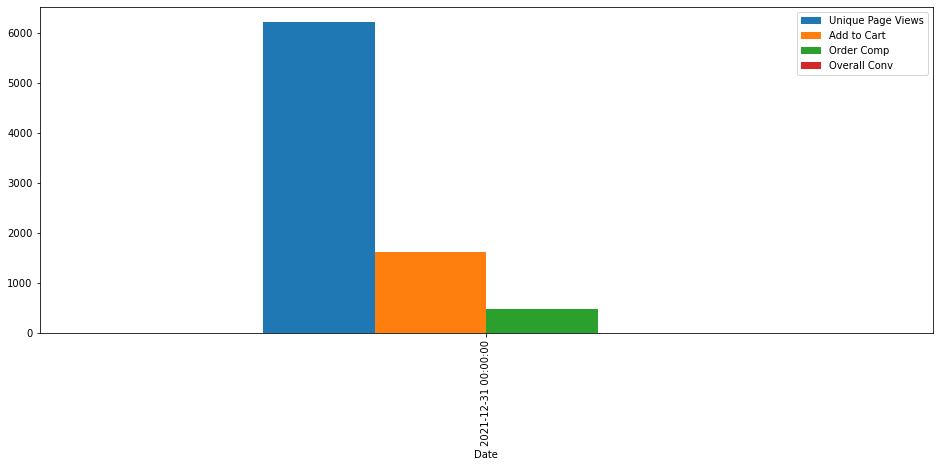

In [33]:
df.resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

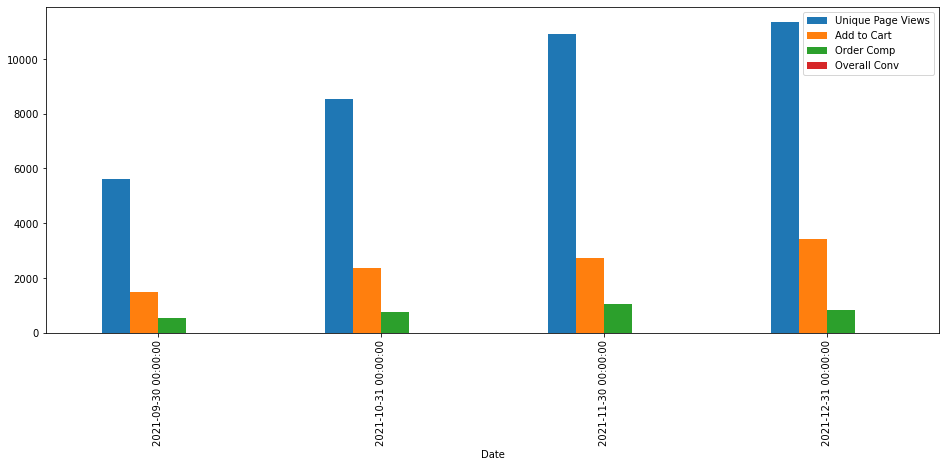

In [34]:
df.resample(rule='M').max().plot(kind='bar')

In [35]:
ts=df['Overall Conv']

In [36]:
ts

Date
2021-09-01    0.0343
2021-09-02    0.0329
2021-09-03    0.0196
2021-09-04    0.0254
2021-09-05    0.0234
               ...  
2021-12-17    0.0206
2021-12-18    0.0268
2021-12-19    0.0183
2021-12-20    0.0221
2021-12-21    0.0191
Name: Overall Conv, Length: 112, dtype: float64

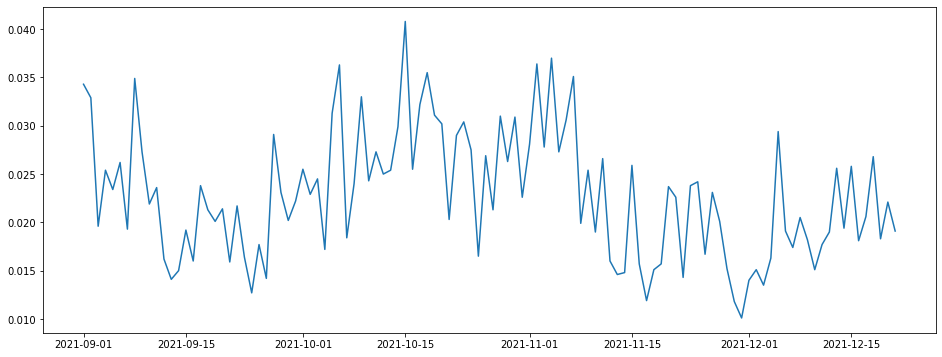

In [37]:
plt.plot(ts)

In [38]:
ts_log=np.log(ts)

In [39]:
ts_log

Date
2021-09-01   -3.372610
2021-09-02   -3.414283
2021-09-03   -3.932226
2021-09-04   -3.673006
2021-09-05   -3.755019
                ...   
2021-12-17   -3.882464
2021-12-18   -3.619353
2021-12-19   -4.000854
2021-12-20   -3.812178
2021-12-21   -3.958067
Name: Overall Conv, Length: 112, dtype: float64

In [40]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #perform Dickey-Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest= adfuller(timeseries,autolag='AIC')
    print(dftest)
    
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]= value
        print(dfoutput)

In [41]:
rolmean=df['Overall Conv'].rolling(window=52,center=False)

In [42]:
df['Overall Conv'].rolling(window=52,center=False).std()

Date
2021-09-01         NaN
2021-09-02         NaN
2021-09-03         NaN
2021-09-04         NaN
2021-09-05         NaN
                ...   
2021-12-17    0.006568
2021-12-18    0.006613
2021-12-19    0.006483
2021-12-20    0.006443
2021-12-21    0.006295
Name: Overall Conv, Length: 112, dtype: float64

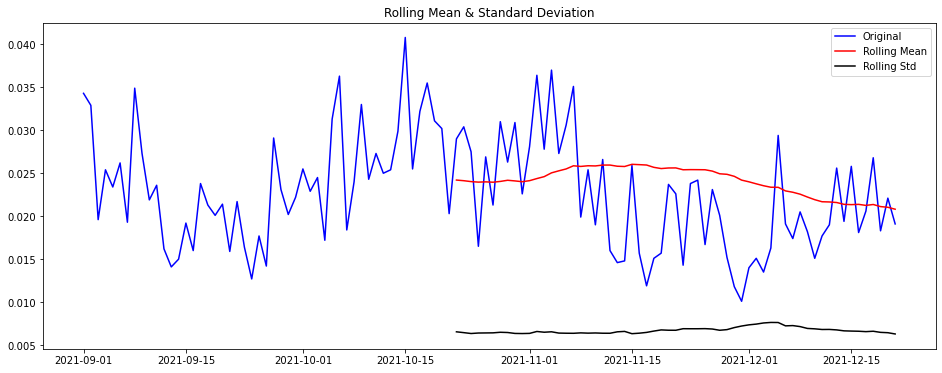

Results of Dickey Fuller Test:
(-1.8776973597678115, 0.34262460475295664, 8, 103, {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}, -741.9699038478475)
Test Statistics                 -1.877697
p-value                          0.342625
#Lags Used                       8.000000
Number of Observations Used    103.000000
Critical value (1%)             -3.495493
dtype: float64
Test Statistics                 -1.877697
p-value                          0.342625
#Lags Used                       8.000000
Number of Observations Used    103.000000
Critical value (1%)             -3.495493
Critical value (5%)             -2.890037
dtype: float64
Test Statistics                 -1.877697
p-value                          0.342625
#Lags Used                       8.000000
Number of Observations Used    103.000000
Critical value (1%)             -3.495493
Critical value (5%)             -2.890037
Critical value (10%)            -2.581971
dtype: float64


In [43]:
test_stationarity(df['Overall Conv'])

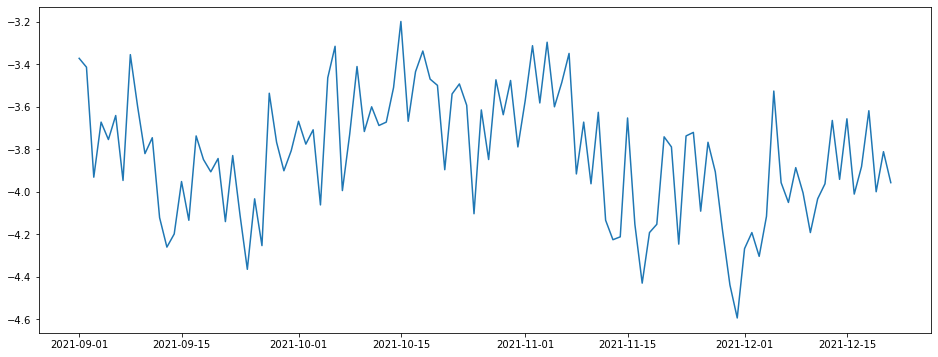

In [44]:
# Time Series is not Stationary

plt.plot(ts_log)

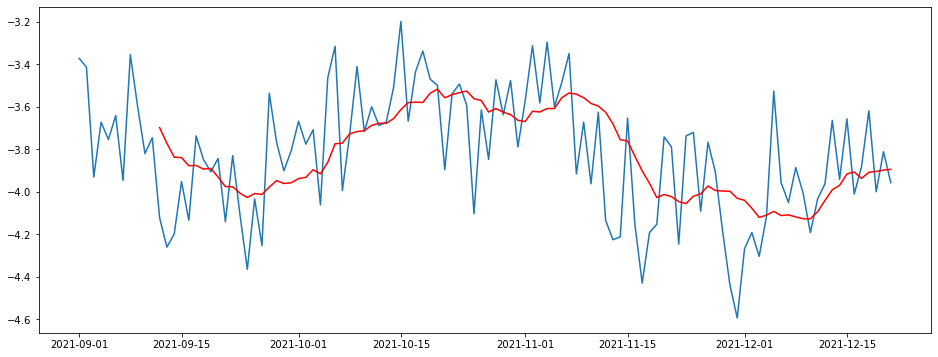

In [45]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='red')

In [46]:
# get the difference between movingAverage and the actual number of Overall Conv.
diff = ts_log - movingAverage
diff.head(12)
# remove NaN values
diff.dropna(inplace=True)
diff.head(10)

Date
2021-09-12   -0.424123
2021-09-13   -0.488879
2021-09-14   -0.361552
2021-09-15   -0.112973
2021-09-16   -0.256781
2021-09-17    0.138903
2021-09-18    0.045179
2021-09-19   -0.016193
2021-09-20    0.087236
2021-09-21   -0.164788
Name: Overall Conv, dtype: float64

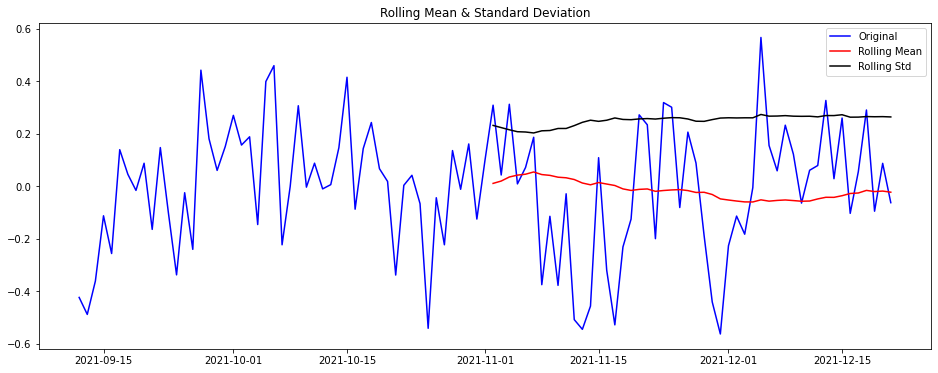

Results of Dickey Fuller Test:
(-4.240277226389862, 0.0005627584917326487, 6, 94, {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}, -2.138873581753842)
Test Statistics                -4.240277
p-value                         0.000563
#Lags Used                      6.000000
Number of Observations Used    94.000000
Critical value (1%)            -3.501912
dtype: float64
Test Statistics                -4.240277
p-value                         0.000563
#Lags Used                      6.000000
Number of Observations Used    94.000000
Critical value (1%)            -3.501912
Critical value (5%)            -2.892815
dtype: float64
Test Statistics                -4.240277
p-value                         0.000563
#Lags Used                      6.000000
Number of Observations Used    94.000000
Critical value (1%)            -3.501912
Critical value (5%)            -2.892815
Critical value (10%)           -2.583454
dtype: float64


In [47]:
test_stationarity(diff)

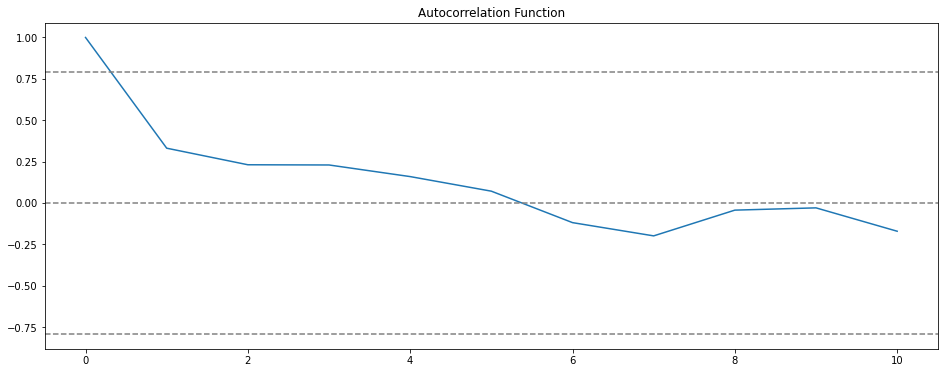

In [48]:
# Now the Time series is stationary

plt.plot(np.arange(0,11), acf(diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

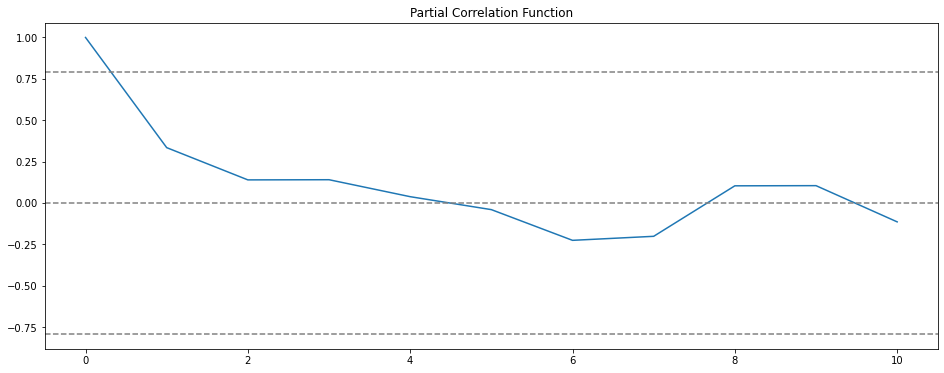

In [49]:
# now plot for pacf
plt.plot(np.arange(0,11),pacf(diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Correlation Function')
plt.show()

Text(0.5, 1.0, 'RSS:nan')

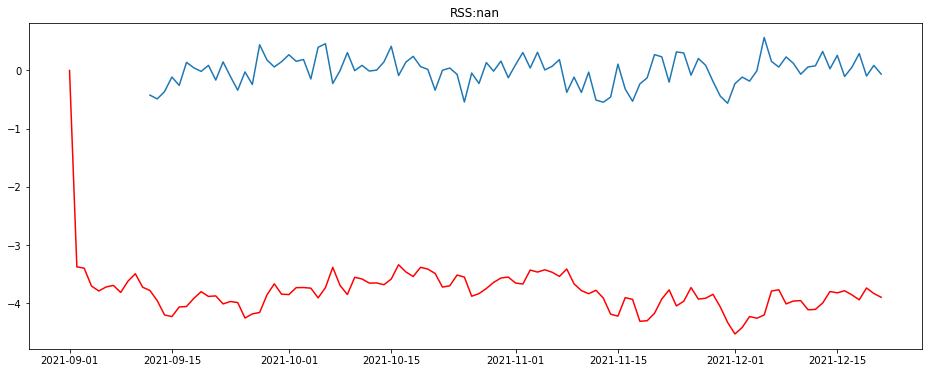

In [50]:
# now plot for ARIMA
model=ARIMA(ts_log,order=(1,1,0))
results_ARIMA=model.fit()
plt.plot(diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum(results_ARIMA.fittedvalues[1:]-diff)**2)

In [51]:
predictions_ARIMA_diffr=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diffr.head()

Date
2021-09-01    0.000000
2021-09-02   -3.372610
2021-09-03   -3.395790
2021-09-04   -3.702380
2021-09-05   -3.788039
dtype: float64

In [52]:
predictions_ARIMA_diffr_cumsum=predictions_ARIMA_diffr.cumsum()
predictions_ARIMA_diffr_cumsum.head()

Date
2021-09-01     0.000000
2021-09-02    -3.372610
2021-09-03    -6.768399
2021-09-04   -10.470779
2021-09-05   -14.258818
dtype: float64

In [53]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diffr_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2021-09-01    -3.372610
2021-09-02    -6.745220
2021-09-03   -10.141009
2021-09-04   -13.843389
2021-09-05   -17.631428
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.2378')

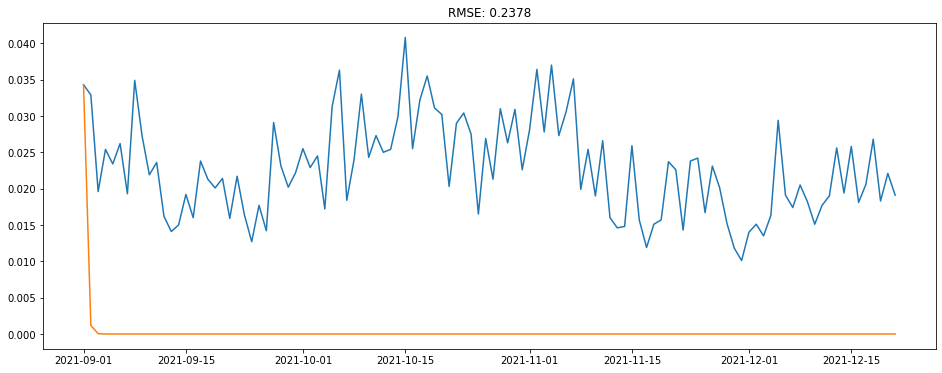

In [54]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt((sum(predictions_ARIMA - ts)**2)/len(ts)))

In [55]:
# If the convergence rate dropping, i suggest to see traffic coming from and
# what changed around the time of the drop in conversion rate. then take a look at sales page and 
# consider making some changes to make it more effective. make sure you're offering enough values.